# Reducción de Dimensionalidad - PCA

La reducción de dimensionalidad, es un proceso que transforma un conjunto de datos con muchas características/features a una versión con menos dimensiones, concervando la mayor cantidad de información posible.

> 💡 Un feature = Una dimensión | 10 features = 10 dimensiones.

**¿Cuándo aplicar una reducción de dimensionalidad?**
- Tenemos dataset con un alto número de features.
- Existe una alta correlación entre las variables.
- El modelo tiene overfitting.
- El entrenamiento del modelo requiere de un alto coste computacional.

**Ventajas**
- Reducción de ruido y complejidad del dataset.
- Acelera el entrenamiento de algoritmos.
- Ayuda en la precisión del modelo.	


El algoritmo más popular de reducción de dimensionalidad es el de _Análisis de Componentes Principales_ (PCA por sus siglas en inglés).

**¿Cómo funciona PCA?** <br>
El principio básico del algoritmo: Intenta combinar diferentes features para crear features "artificiales", pero que mantengan la misma información; a ésto último se le conoce como varianza de los datos o features. 

**Pasos que sigue PCA**:
1. Calcula la matriz de covarianza ➡️ correlación entre los features.
2. Encuentra los valores y vectores propios ➡️ Mide la fuerza y variabilidad de los datos.
3. Ordena y escoge los valores propios con mayor variabilidad ➡️ Capturan más información.

> 📌 **NOTA**: Este apunte es una simplificación de lo que es y hace PCA, ya que por dentro este algoritmo es de un nivel de complejidad alto.


Gracias a librerias como `Scikit-Learn` la implementación de algoritmos complejos como lo es PCA es bastante sencilla, como lo vemos en éste notebook.

Librerías necesarias para el ejercicio:

In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

# Reducción de dimensionalidad
from sklearn.decomposition import PCA, IncrementalPCA

# Modelo de regresión logistica
from sklearn.linear_model import LogisticRegression
# Estandarizador
from sklearn.preprocessing import StandardScaler
# Divir dataset en entrenamiento y pruebas
from sklearn.model_selection import train_test_split

In [2]:
%run 0.0-ml_professional-setup.ipynb

In [3]:
file_path = path.data_raw_dir("heart.csv")
df = pd.read_csv(file_path)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Separamos las features y el target en dataframes diferentes:

In [4]:
df_features = df.drop(columns=["target"])
s_target = df["target"]
display(df_features.head(), s_target.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Estandarización y división de los datos en conjuntos de entrenamiento y pruebas:

In [5]:
df_features = StandardScaler().fit_transform(df_features)

X_train, X_test, y_train, y_test = train_test_split(df_features, s_target, test_size=.2, random_state=42)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (820, 13) y_train: (820,)
X_test: (205, 13) y_test: (205,)


❗Nota: La estandarización de lo datos se realiza antes del split solo en enfoques didácticos, donde el objetivo del aprendizaje es otro (en este caso el de entender PCA).

Entrenamiento de PCA
- `n_components`: Dimensión (features) a la que queremos reducir el dataset.
	- Número entero (`n_components=2`): Conserva los dos primeros componentes principales.
	- Número entre 0 y 1 (`n_components=0.95`): Conserva los componentes necesarios que capturan el 95% de la varianza de los datos.

In [6]:
# PCA
pca = PCA(n_components=3)
pca.fit(df_features)

PCA(n_components=3)

Entrenamiento de IPCA
- `n_components`: Dimensión (features) a la que queremos reducir el dataset.
	- Número entero (`n_components=2`): Conserva los dos primeros componentes principales.
	- Número entre 0 y 1 (`n_components=0.95`): Conserva los componentes necesarios que capturan el 95% de la varianza de los datos.
- `batch_size`: Número de muestras utilizadas en cada batch (iteración).

📌 **Incremental PCA**, no envía todos los datos a entrenar al mismo tiempo, sino que envía pequeños lotes de información (`n_futures * batch_size`) para entrearlos poco a poco. Esta alternativa al análisis de componentes principales tradicional, se utiliza cuando el dataset es muy extenso y los recursos de computo no son suficientes para utiliar PCA.

In [7]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(df_features)

IncrementalPCA(batch_size=10, n_components=3)

Visualizamos la varianza capturada con 3 componentes, tanto con PCA como con IPCA.

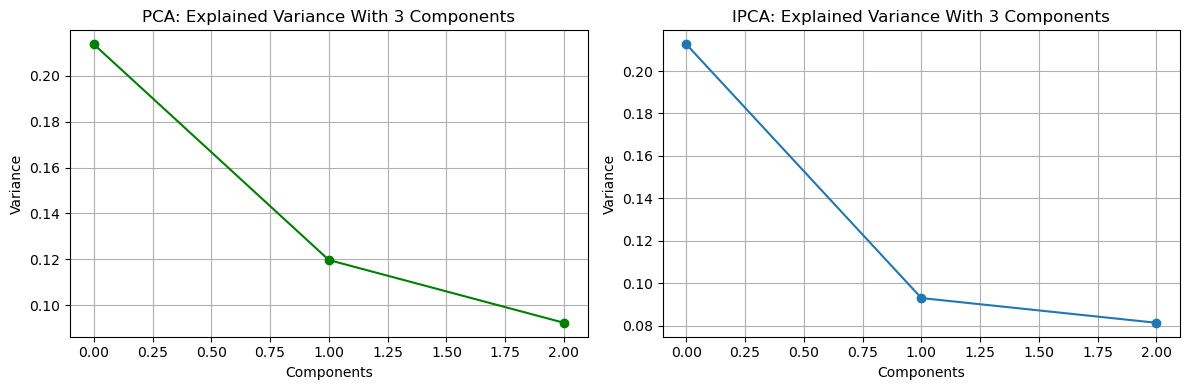

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# ==== PCA ==== 
axes[0].plot(
	range(len(pca.explained_variance_)),
 	pca.explained_variance_ratio_,
  marker="o",
  color="green",
)
axes[0].set_title("PCA: Explained Variance With 3 Components")
axes[0].set_xlabel("Components")
axes[0].set_ylabel("Variance")
axes[0].grid(True)


# ==== IPCA ==== 
axes[1].plot(
	range(len(ipca.explained_variance_)),
 	ipca.explained_variance_ratio_,
  marker="o",
)
axes[1].set_title("IPCA: Explained Variance With 3 Components")
axes[1].set_xlabel("Components")
axes[1].set_ylabel("Variance")
axes[1].grid(True)

plt.tight_layout();


La reducción a tres dimensiones con PCA captura mayor varianza con los primeros 2 componentes (+20% y 12%), que la varianza capturada con IPCA (+20% y >10%).

Entrenamos el modelo de regresión logistica con los componentes generados con PCA.

In [9]:
lr_pca = LogisticRegression()

# Reduce y transforma los datos de entrenamiento y pruebas a los 3 componentes generados con PCA:
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

# Entrenamiento el modelo:
lr_pca.fit(X_train_trans, y_train)

score = lr_pca.score(X_test_trans, y_test)

Entrenamos el modelo de regresión logistica con los componentes generados con IPCA.

In [10]:
lr_ipca = LogisticRegression()

# Reduce y transforma los datos de entrenamiento y pruebas a los 3 componentes generados con PCA:
X_train_trans_ = ipca.transform(X_train)
X_test_trans_ = ipca.transform(X_test)

# Entrenamiento el modelo:
lr_ipca.fit(X_train_trans_, y_train)

score_ = lr_ipca.score(X_test_trans_, y_test)

Comparamos los scores de ambos modelos.

In [11]:
print(f"Score con PCA: {score:.2%}")
print(f"Score con IPCA: {score_:.2%}")

Score con PCA: 79.02%
Score con IPCA: 74.15%


El modelo de regresión lógistica entrenado con los componentes generados por PCA obtuvo en acuracy mayor (79%), que el modelo entrenado con componentes IPCA (74%), lo cuál es logico teniendo en cuenta que PCA capturo mayor varianza que IPCA.